# Importando as bibliotecas

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

# Importando a base de dados


In [0]:
dados = pd.read_csv('/content/Mission_Prediction_Dataset.csv')

In [0]:
dados

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [0]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Pela função info, sabe-se que 13 dados são do tipo int e 1 do tipo float

---



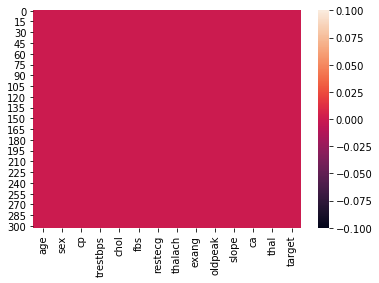

In [0]:
sns.heatmap(dados.isnull());

Pelo mapa de calor, sabe-se que não há colunas sem dados ou com dados incompletos.

# Visualização da base de dados

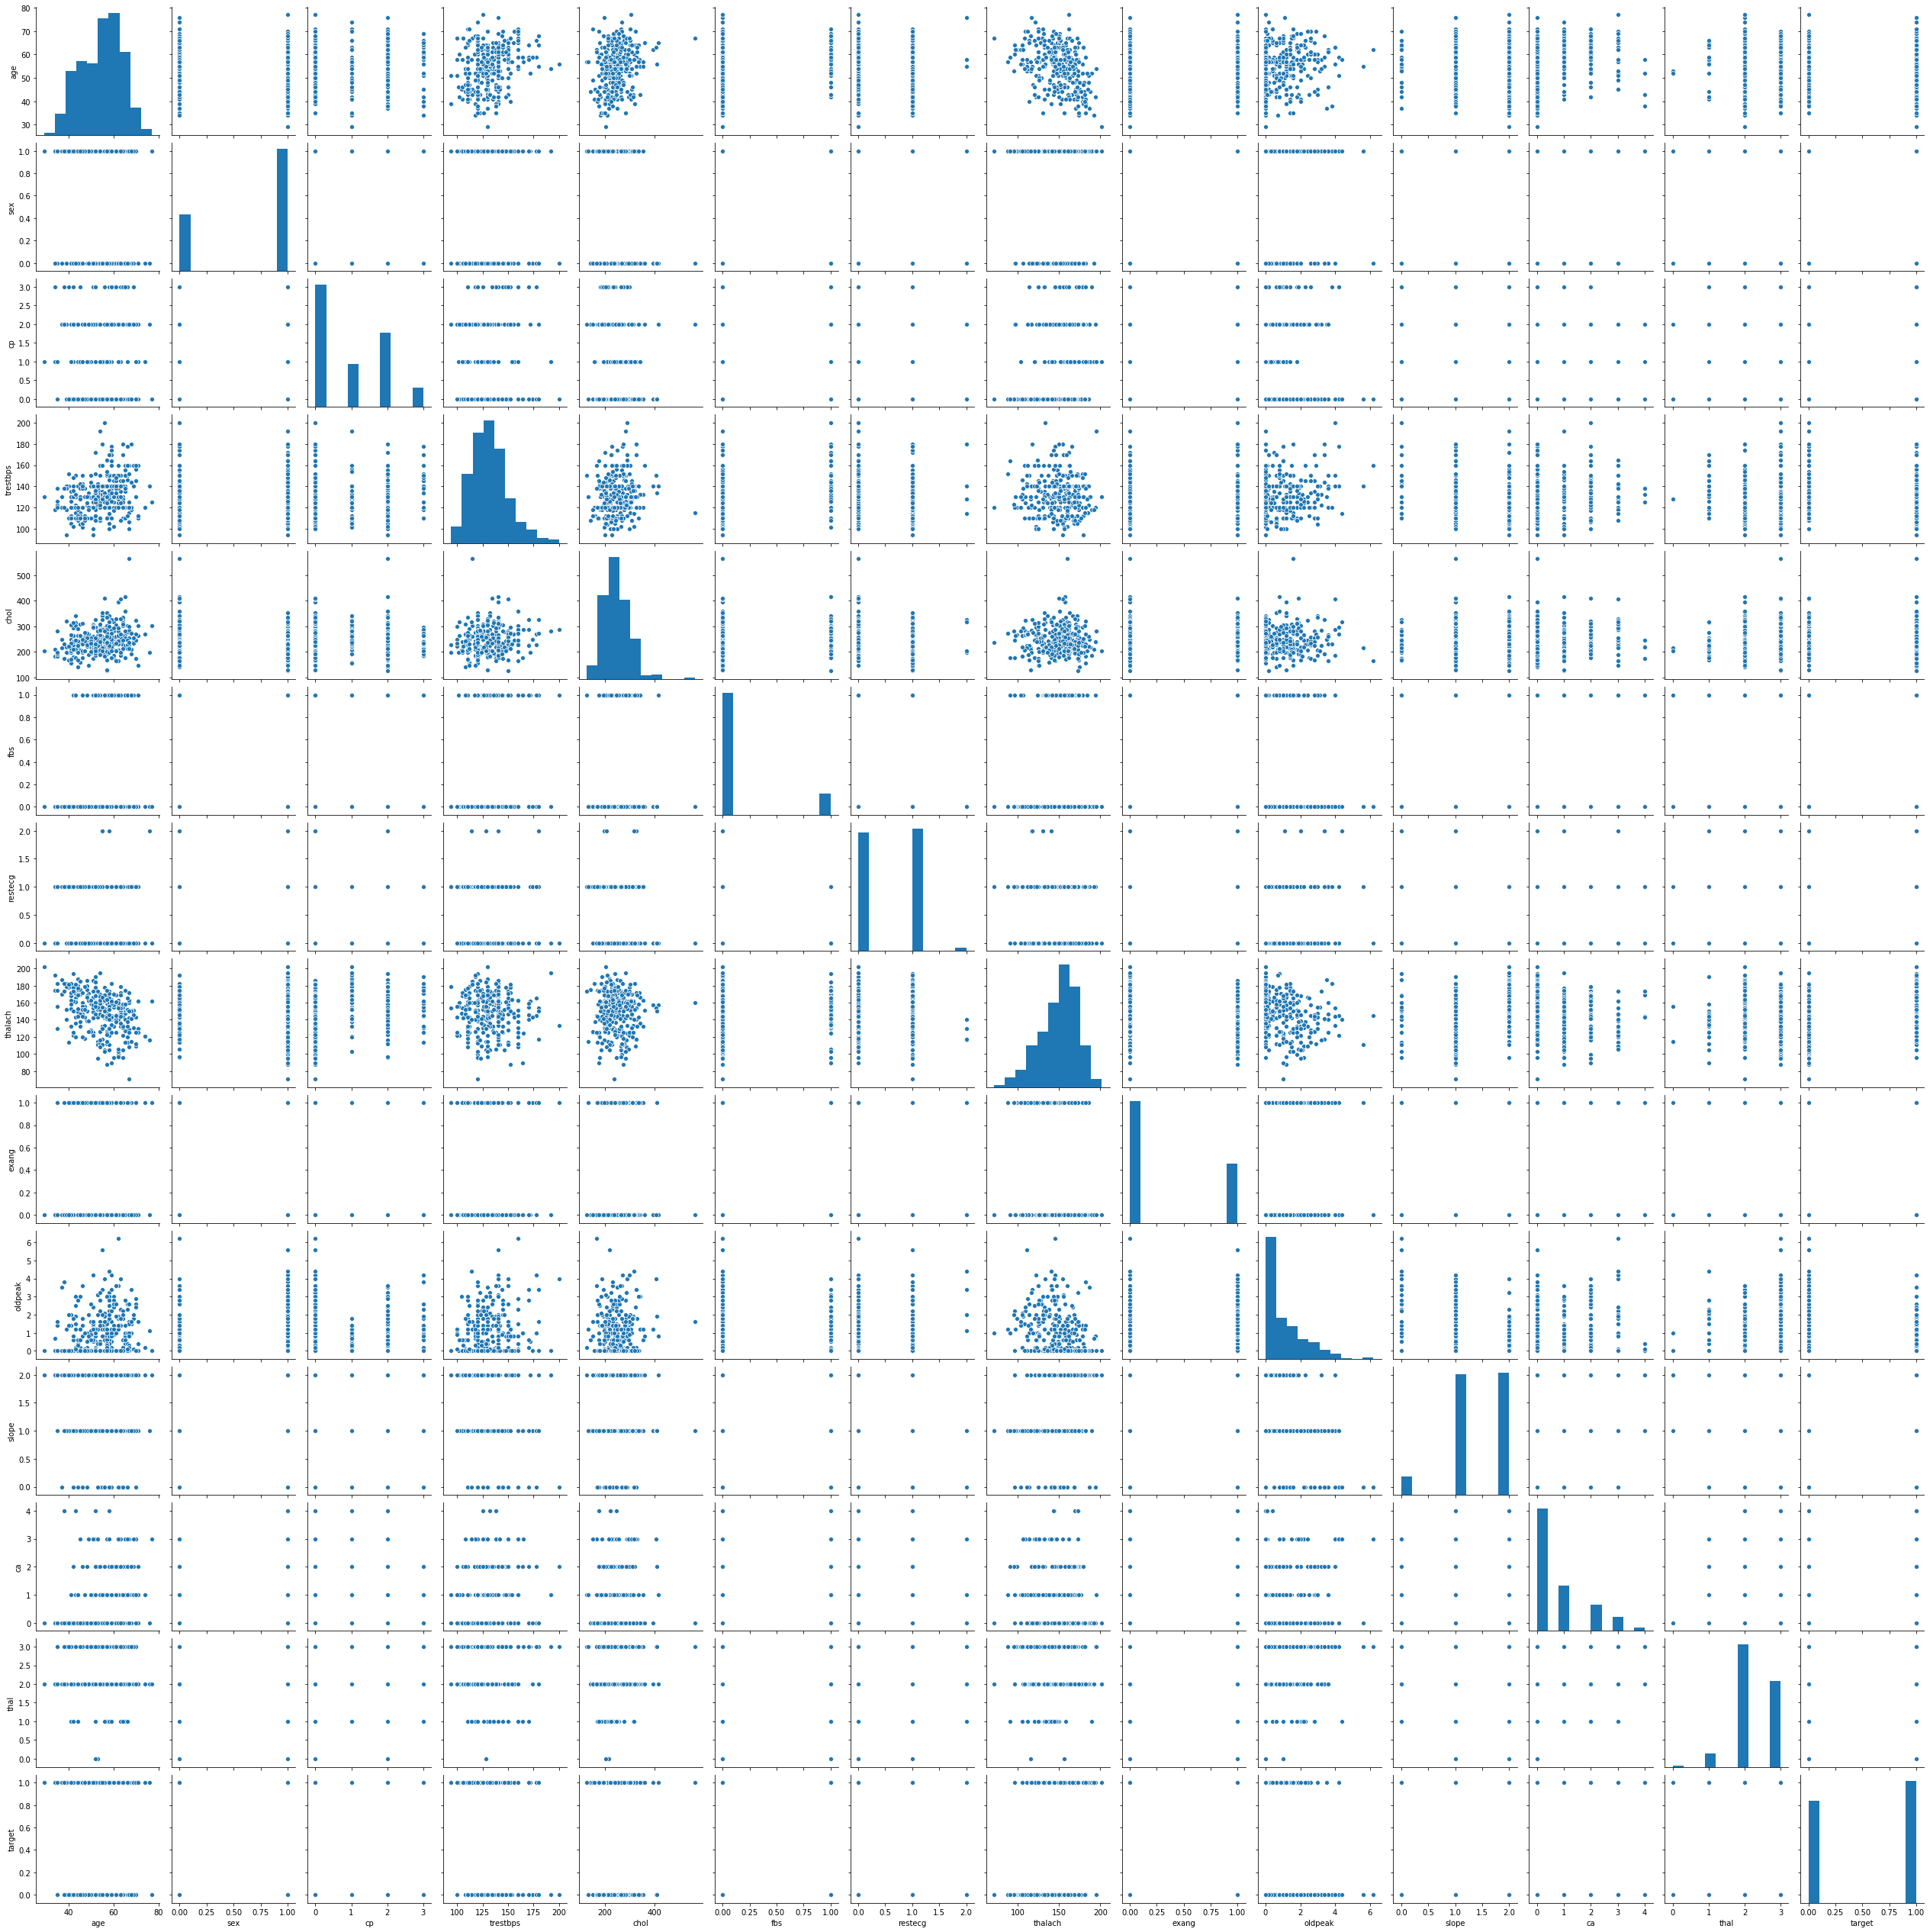

In [0]:
sns.pairplot(dados)

Percebe-se olhando os dados, que a base das 13 colunas possui pequenas depêndencia entre variáveis.
Por exempo:
 

1.   Grafico Thalach X Age 
 
   Pessoas com maior idades tendem a ter menor taxa de batimento cardiaco 
batimento máxima atingida.

Ao mesmo tempo, percebe-se que algumas váriavies não possuem tanta correlação quanto é visto pelo senso comun.
2.   Grafico Target X Age 
 
   Ve-se que o banco de dados possui uma distribuição bem ampla para não priorizar um grupo de indivíduos com idade mais avançada.
 



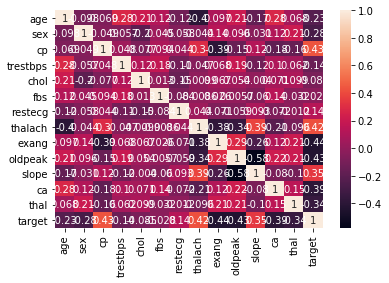

In [0]:
sns.heatmap(dados.corr(), annot = True  );

Diante do mapa de correlação, observa-se que a as váriáveis sloop e oldpeak possuem 58% de correlação, ou seja, talvez eu possa tratar as 2 para ver se o a rede neural convergiria para um erro menor ou maior. 

# Tratamento das bases de dados

In [0]:
X_int = dados[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

In [0]:
X_int.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


Percebe-se que os dados sex, cp, fbs, restecg, exang, slope, ca e thal estão na forma de label encoding o que pode resultar em uma performance ruim para o modelo, dessa maneira irei trocar para one-hot-enconding.

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_int = onehotencoder.fit_transform(X_int).toarray()

In [0]:
X_int

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [0]:
X_int.shape

(303, 25)

Logo 8 atributos foram transformados em 25.

In [0]:
X_int = pd.DataFrame(X_input)

In [0]:
X_int.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [0]:
X_numerical = dados [['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']]

In [0]:
X_all = pd.concat([X_int, X_numerical], axis = 1)


In [0]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,age,trestbps,chol,thalach,oldpeak,target
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,63,145,233,150,2.3,1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37,130,250,187,3.5,1
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,41,130,204,172,1.4,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,56,120,236,178,0.8,1
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57,120,354,163,0.6,1


Concatenei os atributos tratados com os restantes

In [0]:
X = X_all.iloc[:, :-1].values

Y = X_all.iloc[:, -1:].values

In [0]:
X.shape

(303, 30)

Então na entrada da minha rede neural terão no total 30 atributos.

In [0]:
Y.shape

(303, 1)

E só há uma saida para ela.

# Divisão Base de treinamento X Base de teste

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

Seguindo um requisito fiz um split de 70% / 30%.

In [0]:
X_train.shape

(212, 30)

# Construção e treinamento do modelo

In [0]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units = 400, activation='relu', input_shape=(30,)))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Estou usando a função relu nas camadas ocultas para não perder o gradiente e para minimizar o processamento e adicionei a função sigmoid por ser uma função que oferece um valor entre 0 e 1.
Perante as versões anteriores, eu percebi que o modelo apresentar accuracy 1 em seu treino não implica que o modelo é melhor, pois pode acontecer o overfitting. Dessa maneira, aumentei a quantidade de neurônios em relação as outras versões dessa rede, contudo coloquei a função dropout para imperdir justamente o overfitting.


In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_39 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_40 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 101       
Total params: 23,401
Trainable params: 23,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics= ['accuracy'])

Estou usando o binary_crossentropy, pois esse é um problema de classificação tendo dois possíveis valores: positivo ou negativo

In [0]:
epochs_hist = classifier.fit(X_train, Y_train, epochs = 200)

Train on 212 samples
Epoch 1/200
212/212 [==============================] - 0s 2ms/sample - loss: 11.4775 - accuracy: 0.5189
Epoch 2/200
212/212 [==============================] - 0s 176us/sample - loss: 5.3648 - accuracy: 0.5236
Epoch 3/200
212/212 [==============================] - 0s 176us/sample - loss: 4.2049 - accuracy: 0.5802
Epoch 4/200
212/212 [==============================] - 0s 160us/sample - loss: 4.1939 - accuracy: 0.5849
Epoch 5/200
212/212 [==============================] - 0s 183us/sample - loss: 3.4353 - accuracy: 0.5849
Epoch 6/200
212/212 [==============================] - 0s 205us/sample - loss: 2.9964 - accuracy: 0.5660
Epoch 7/200
212/212 [==============================] - 0s 155us/sample - loss: 2.3468 - accuracy: 0.6038
Epoch 8/200
212/212 [==============================] - 0s 179us/sample - loss: 2.3646 - accuracy: 0.6132
Epoch 9/200
212/212 [==============================] - 0s 182us/sample - loss: 1.9048 - accuracy: 0.6368
Epoch 10/200
212/212 [=============

Coloquei para treinar fazendo o erro com todas as linhas.

# Avaliacão do modelo


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
Y_pred_train = classifier.predict(X_train)
Y_pred_train

array([[1.05138617e-02],
       [5.20654321e-01],
       [3.86101991e-01],
       [7.08567381e-01],
       [5.14818966e-01],
       [7.59516001e-01],
       [4.78067994e-02],
       [1.01398060e-03],
       [3.80145386e-03],
       [1.49738253e-03],
       [4.72374290e-01],
       [9.93230581e-01],
       [8.40912402e-01],
       [8.91723037e-01],
       [8.84613276e-01],
       [9.57446814e-01],
       [4.10390854e-01],
       [8.69230509e-01],
       [1.49003090e-02],
       [4.42528026e-03],
       [8.54086101e-01],
       [9.13375318e-01],
       [5.70709407e-01],
       [9.35250223e-02],
       [9.43644624e-03],
       [9.72144306e-01],
       [3.46140265e-01],
       [2.21284300e-01],
       [9.88794446e-01],
       [9.73770678e-01],
       [7.26851046e-01],
       [4.68023390e-01],
       [9.99727786e-01],
       [9.73597765e-01],
       [7.60202110e-01],
       [9.19059813e-01],
       [3.84066343e-01],
       [2.48856395e-02],
       [2.64444113e-01],
       [8.24468553e-01],


In [0]:
Y_pred_train = (Y_pred_train > 0.5)
Y_pred_train

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [0]:
cm = confusion_matrix(Y_train, Y_pred_train)
cm

array([[94,  9],
       [16, 93]])

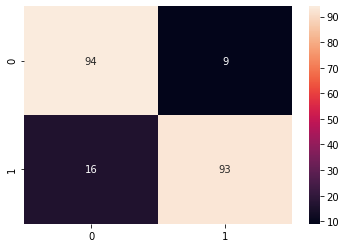

In [0]:
sns.heatmap(cm, annot=True);

Como esperado a accuracy é diferente de 100%, possuindo 9 falsos positivos e 16 falso negativo dentro dos dados de treinamento. Logo,fazendo os calculos,tem - se 88%, ou seja o modelo preditivo não está tão ajustado aos dados de treinamento.


In [0]:
Y_pred_test = classifier.predict(X_test)
Y_pred_test = (Y_pred_test > 0.5)
cm = confusion_matrix(Y_test, Y_pred_test)
cm

array([[30,  5],
       [10, 46]])

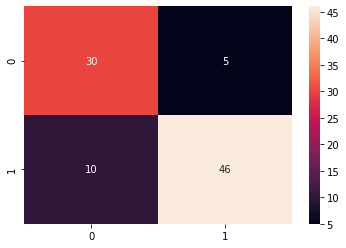

In [0]:
sns.heatmap(cm, annot=True);

Nesse sentido, o modelo deu 5 falsos positivos e 10 falso negativos.Logo sua accuracy é 83,5%

Com isso, infere-se que na versão anterior a accuracy do banco de dados era 100 % contudo ao testa-la com os dados de teste ela caia para 71.4%. Em contrapartida, a accuracy do banco de dados de treinamento foi 88%, mas quando testada caiu para 83,5%. Concluindo-se que na versão anterior houve overfitting

In [0]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

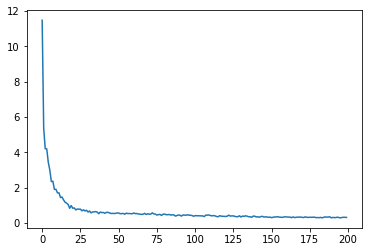

In [0]:
plt.plot(epochs_hist.history['loss']);

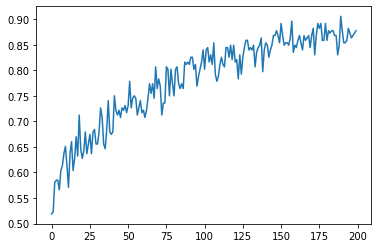

In [0]:
plt.plot(epochs_hist.history['accuracy']);

Com base nas versões anteriores, eu cheguei a conclusão que o sistema não tem uma taxa de convergência significativa a partir de 200 gerações.
Nesse contexto, infere-se que a accuracy desse modelo atual não tenderia para 1, visto que possui a função drop.